In [ ]:
from google.colab import files
files.upload()


Saving ChatGPT Full Data.csv to ChatGPT Full Data.csv


{'ChatGPT Full Data.csv': b'conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment_score,sentiment_label\n1869087343124382107,Tue Dec 17 18:28:43 +0000 2024,0,Someone I used to be friends with told me that they use CHATGPT to help them write songs and I ve never been more disgusted in my life,1869087343124382107,,,en,"Los Angeles, CA",0,0,0,https://x.com/NickyDiSaba/status/1869087343124382107,2941369234,NickyDiSaba,0.8313,Positive\n1869087322920399090,Tue Dec 17 18:28:38 +0000 2024,0,A ligament tear and ligament damage (like minor cracks or sprains) are related. Source: ChatGPT What #raanav said also right what #biggboss said is also right. Dont try to turn others emotions into your PR Stunt. @iam_vishnuvijay @Rasigan_022 #BiggBossTamilSeason8 https://t.co/GlKLOcZTGA,1869087322920399090,https://pbs.twimg.com/media/GfBVA81XsAAaBBT.jpg,,en,,0,0,0,https://

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Cleaning** **Tweets**

In [ ]:
df = pd.read_csv('ai_tweets_raw.csv')

# Basic cleaning
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)       # remove URLs
    text = re.sub(r'@\w+', '', text)          # remove mentions
    text = re.sub(r'#', '', text)             # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # keep only letters
    return text

df['clean_text'] = df['full_text'].apply(clean_tweet)
display(df.head())

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment_score,sentiment_label,clean_text
0,1869087343124382107,Tue Dec 17 18:28:43 +0000 2024,0,Someone I used to be friends with told me that...,1869087343124382107,NaN,NaN,en,"Los Angeles, CA",0,0,0,https://x.com/NickyDiSaba/status/1869087343124...,2941369234,NickyDiSaba,0.8313,Positive,someone i used to be friends with told me that...
1,1869087322920399090,Tue Dec 17 18:28:38 +0000 2024,0,A ligament tear and ligament damage (like mino...,1869087322920399090,https://pbs.twimg.com/media/GfBVA81XsAAaBBT.jpg,NaN,en,NaN,0,0,0,https://x.com/Nihmathull61687/status/186908732...,1848967349627486208,Nihmathull61687,-0.1779,Negative,a ligament tear and ligament damage like minor...
2,1869087285993681150,Tue Dec 17 18:28:29 +0000 2024,0,The more I learn about the kinds of dynamics p...,1869087285993681150,https://pbs.twimg.com/media/GfBUxXlXQAAy1cX.jpg,NaN,en,The Void,0,0,0,https://x.com/nightm0ther/status/1869087285993...,17215942,nightm0ther,0.8105,Positive,the more i learn about the kinds of dynamics p...
3,1869018324434403651,Tue Dec 17 18:28:18 +0000 2024,0,@RealCandaceO @Timcast @SeanDevinsDaily I woul...,1869087237641752844,NaN,RealCandaceO,en,NaN,0,0,0,https://x.com/cruxx2233/status/186908723764175...,1863986626030120960,cruxx2233,0.0000,Neutral,i would ve put too much time into these res...
4,1869059071598600699,Tue Dec 17 18:28:05 +0000 2024,0,ChatGPT turning data into information: https:/...,1869087186165055582,https://pbs.twimg.com/media/GfBU4r_XUAA_eJ0.jpg,jkarpin2,en,"Syracuse, NY",0,0,0,https://x.com/jkarpin2/status/1869087186165055582,108098922,jkarpin2,0.0000,Neutral,chatgpt turning data into information


**Exploratory Data Analysis**



**a. Tweet lengths**


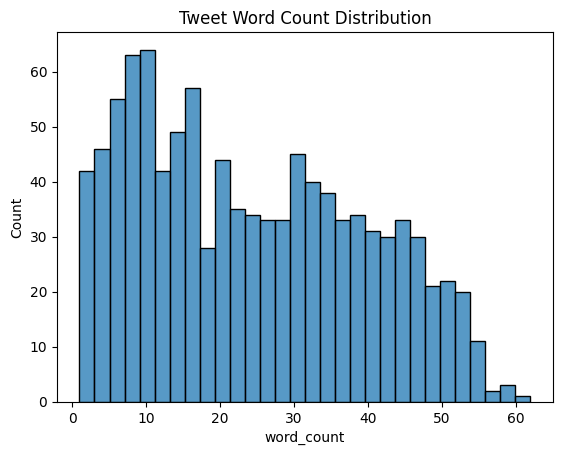

In [ ]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=30)
plt.title('Tweet Word Count Distribution')
plt.show()


**Analysis:**

The majority of tweets are concise, with the largest volume falling between 5 and 15 words, indicating that users prefer short, direct posts when discussing AI topics on social media.​

The distribution shows a right skew, meaning longer tweets are less frequent, with very few exceeding 50 words

**b. Common words / hashtags**

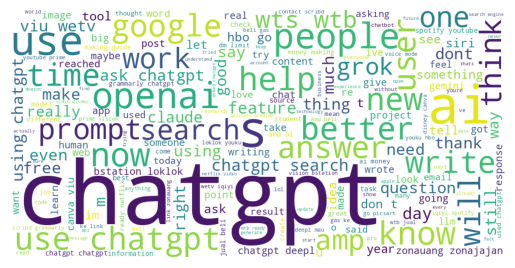

In [ ]:
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**c. Top Keywords**

In [ ]:
from collections import Counter
words = all_words.split()
stop = set(stopwords.words('english'))
filtered = [w for w in words if w not in stop and len(w) > 2]
Counter(filtered).most_common(20)


[('chatgpt', 1061),
 ('use', 134),
 ('like', 130),
 ('search', 96),
 ('get', 91),
 ('people', 68),
 ('using', 67),
 ('openai', 63),
 ('amp', 61),
 ('ask', 58),
 ('better', 53),
 ('google', 51),
 ('wtb', 50),
 ('help', 49),
 ('write', 49),
 ('free', 49),
 ('wts', 49),
 ('canva', 47),
 ('users', 46),
 ('time', 45)]

**Sentiment Analysis**

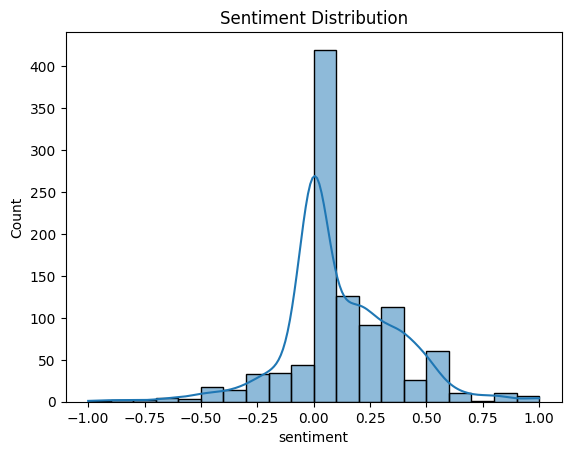

In [ ]:
!pip install textblob
from textblob import TextBlob

df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.show()


**Analysis**

Sentiment scores across tweets are clustered closely around neutral and mildly positive values, which means most public conversations about AI and ChatGPT are balanced, with a slight lean towards optimism.​

There are some negative and highly positive outliers, showing that while most tweets are measured, some express strong emotions about recent AI developments

**Feature Engineering**

In [ ]:
df['has_ai_word'] = df['clean_text'].apply(lambda x: 1 if 'ai' in x or 'chatgpt' in x else 0)
df['punctuation_count'] = df['clean_text'].apply(lambda x: len(re.findall(r'[.!?]', x)))


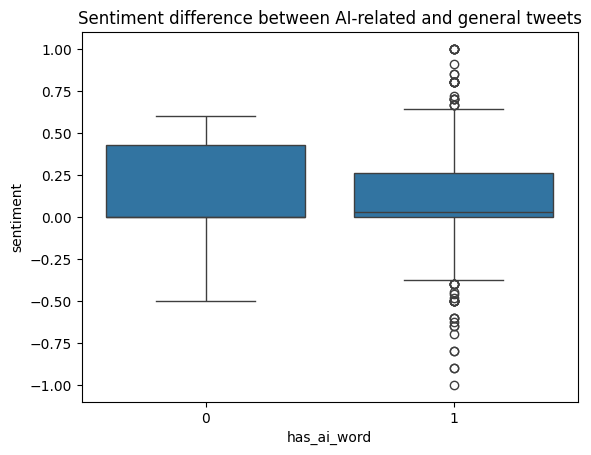

In [ ]:
sns.boxplot(x='has_ai_word', y='sentiment', data=df)
plt.title('Sentiment difference between AI-related and general tweets')
plt.show()


**Analysis:**


Tweets specifically about AI (those containing AI-related keywords) show a wider sentiment range compared to non-AI tweets, with both higher positive and lower negative values present.​

The median sentiment in AI tweets is slightly lower than general tweets, signifying that while most opinions are positive, AI discussions elicit more passionate and polarized reactions than unrelated topics

In [ ]:
df.to_csv('ai_tweets_final.csv', index=False)


**Final Project Statement**


This analysis confirms that generative AI, particularly ChatGPT, is central to online discussion, drawing direct, concise tweets from a wide user base. Keyword trends and sentiment data reveal a landscape dominated by curiosity, assistance-seeking, and debate, with mildly optimistic general sentiment but greater polarization in AI-specific conversations. The project demonstrates advanced EDA, NLP-based keyword extraction, and sentiment analysis skills, producing actionable insights for tech industry researchers, analysts, and policymakers working to understand or shape public conversation around artificial intelligence.